In [1]:
from symred.symplectic import PauliwordOp
from symred.symplectic import random_anitcomm_2n_1_PauliwordOp, random_PauliwordOp
from symred.unitary_partitioning import AntiCommutingOp, apply_LCU_to_operator_only_necessary_ops
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np

In [2]:
### AC set is size 2n_qubits+1

# n_qubits = 6
# n_terms_H = 5_00

n_qubits = 6
n_terms_H = 1_00

# n_qubits = 15
# n_terms_H = 5


In [3]:
complex_coeff = False
apply_clifford = True

random_anti_op = random_anitcomm_2n_1_PauliwordOp(n_qubits,
                                                  complex_coeff=complex_coeff, 
                                                  apply_clifford=apply_clifford)

In [4]:
H_rand = random_PauliwordOp(n_qubits, n_terms_H, diagonal=False, complex_coeffs=complex_coeff)

In [5]:
size_A = 2*n_qubits+1

LCU_hamilts=[]
SeqRot_hamilts=[]

all_rows = np.arange(size_A)
for clique_size in tqdm(range(2,size_A)):
    
    np.random.shuffle(all_rows) # shuffle rows
    rows = all_rows[:clique_size] # take only certain number
    UP = AntiCommutingOp(random_anti_op.symp_matrix[rows, :],
                         random_anti_op.coeff_vec[rows])
    
    
    ## Sequence of rotations
    R_seq_rot, P_seq = UP.gen_seq_rotations(check_reduction=False)
    SeqRot_H = H_rand.copy()
    for X_sk, theta_sk in R_seq_rot:
        SeqRot_H = SeqRot_H._rotate_by_single_Pword(X_sk, theta_sk)
    SeqRot_hamilts.append(SeqRot_H)
    
    ## LCU method
    R_LCU, P_lcu = UP.gen_LCU(check_reduction=False)
    LCU_H = apply_LCU_to_operator_only_necessary_ops(H_rand, R_LCU)
    LCU_hamilts.append(LCU_H)

  0%|          | 0/11 [00:00<?, ?it/s]

In [6]:
LCU_sizes = [h.n_terms for h in LCU_hamilts]
SeqRot_sizes = [h.n_terms for h in SeqRot_hamilts]

In [7]:
def SeqRotScaling(size_A, size_H):
    size_R = size_A-1
#     return size_H*(size_R**2/2 + size_R/2)
#     return size_H/2*size_R*(size_R+1)
#     return size_H/2*size_R**2*(size_R+1)
#     return size_H/4 *size_R**2 * (size_R**2 - 1)
#     return size_H/12 * (size_R**4 - size_R**2)
#     return size_H * ( (size_R**4)/12 + (size_R**3)/3 + (5*size_R**2)/12 + (size_R)/6 )
#     return size_H * ( (size_R**3)/2 + (size_R**2)/2 )
#     return size_H * ( (size_R**4)/6 + (size_R**3)/2 + (size_R**2)/3 )
#     return size_H/24 * (size_R-1) * size_R * (size_R+1) * (5*size_R+2)

#     return (2**(size_R))*size_H
#     return (2**(size_R))*size_H - (2**(size_R)) + 1

#     test_terms= sum([size_R**R_si/(3*R_si**R_si) for R_si in range(1, size_R)])

#     test_terms= sum([R_si*size_H for R_si in range(1, size_R)])
#     return ( test_terms + size_H)

#     terms = (size_R**2)/2 + (3*size_R)/2 +1
#     return ( size_H + size_H*terms)

#     terms = (size_R**3)/2 + (size_R**2)/2
#     return ( size_H + size_H*terms)
    terms = (size_R**3)//6 + (size_R**2)//2 + (size_R)//3
    return ( size_H + size_H*terms)

#     return size_H * ( 2**(size_R+1)-2 )



SeqRot_scaling = [SeqRotScaling(A , H_rand.n_terms) for A in range(2,size_A)]
SeqRot_scaling

[1000, 4000, 10000, 20000, 34000, 57000, 84000, 120000, 165000, 220000, 285000]

In [8]:
SeqRot_sizes

[1215, 1669, 2137, 2762, 3261, 3565, 3820, 3899, 4001, 4075, 4074]

original H size: 1000
n_qubits: 6


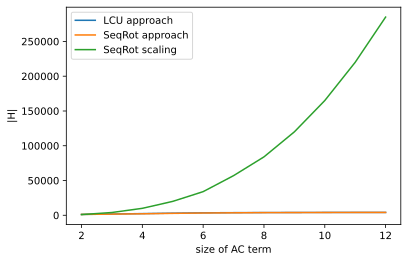

In [9]:
%matplotlib inline

print(f'original H size: {H_rand.n_terms}')
print(f'n_qubits: {H_rand.n_qubits}')


AC_set_sizes = list(range(2,size_A))

plt.plot(AC_set_sizes, LCU_sizes, label='LCU approach')
plt.plot(AC_set_sizes, SeqRot_sizes, label='SeqRot approach')

plt.plot(AC_set_sizes, SeqRot_scaling, label='SeqRot scaling')

plt.ylabel('|H|')
plt.xlabel('size of AC term')
plt.xticks(list(range(2, size_A, 2)))

plt.legend()
plt.show()

original H size: 1000
n_qubits: 6


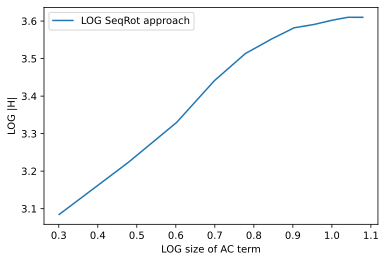

In [10]:
%matplotlib inline

log_y_SeqRot = np.log10(SeqRot_sizes)
log_x_SeqRot = np.log10(AC_set_sizes)

print(f'original H size: {H_rand.n_terms}')
print(f'n_qubits: {H_rand.n_qubits}')


plt.plot(log_x_SeqRot, log_y_SeqRot, label='LOG SeqRot approach')


plt.ylabel('LOG |H|')
plt.xlabel('LOG size of AC term')
# plt.xticks(list(range(2, size_A, 2)))

plt.legend()
plt.show()

In [11]:
# LCU_sizes

In [12]:
# SeqRot_sizes

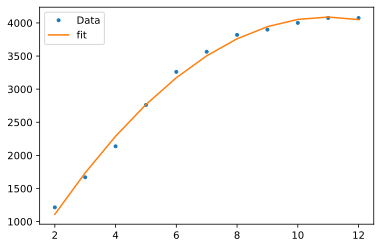

[ -36.9277391   811.02471104 -364.07273374]


In [13]:
import scipy.optimize as opt;

# This is the function we are trying to fit to the data.
def func(x, a, b, c):
     return a * np.exp(b*x) + c

    
def func(x, a, b, c, d, e):
     return a*x**4 + b*x**3 + c*x**2 + d*x + e

def func(x, a, b, c):
     return a*x**2 + b*x + c



xdata = np.array(AC_set_sizes)

# ydata = np.array(LCU_sizes)
ydata = np.array(SeqRot_sizes)

# Plot the actual data
plt.plot(xdata, ydata, ".", label="Data");

# The actual curve fitting happens here
optimizedParameters, pcov = opt.curve_fit(func, xdata, ydata);

# Use the optimized parameters to plot the best fit
plt.plot(xdata, func(xdata, *optimizedParameters), label="fit");

# Show the graph
plt.legend();
plt.show();

print(optimizedParameters)

In [14]:
60/2

30.0

In [15]:
1/50

0.02

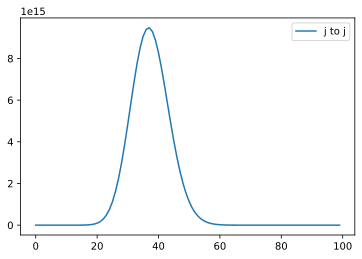

In [16]:
%matplotlib inline

def j_to_j(j):
    return j**j

def A_to_J(a,j):
    return a**j

A = 100
j_j = np.array([j_to_j(j) for j in range(A)])
A_j = np.array([A_to_J(A, j) for j in range(A)])


# plt.plot(range(A), j_j, label='j to j')
# plt.plot(range(A), A_j, label='A to j')
plt.plot(range(A), A_j/j_j, label='j to j')

plt.legend()
plt.show()